# Spotify Dataset # 1 

This notebook is an analysis of the FIRST spotify dataset supposedly scraped from Spotify's API and posted on Kaggle. This dataset includes attributes of 10130 songs: 565 absolute music, 740 classical music, 1052 electronic music, 1273 folk, 1141 hiphop, 1065 jazz, 1867 popular, 1087 rnb, 1340 rock. The features for each song are:danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, song_name, artist, genre. There wasn't any information available on the where this data came from, when it was scraped, or the dates of the songs, but the column descriptions below are from a similar spotify dataset. 

**Concerns:**
- size of the dataset 


#### Column Dictionary
- track: The Name of the track.

- artist: The Name of the Artist.

- uri: The resource identifier for the track.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).





## Preliminary EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
spotify = pd.read_csv("~/Downloads/spotifydata.csv", encoding = "ISO-8859-1")

In [3]:
# Checking the shape of the dataframe 
spotify.shape

(10131, 22)

There are 10,131 rows and 22 columns.

In [4]:
# name of columns
spotify.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'song_name', 'artist', 'genre'],
      dtype='object')

In [5]:
# checking the top of the data 
spotify.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music
2,2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music
3,3,0.738,0.861,2.0,-4.141,1.0,0.2370,0.318000,0.001820,0.3250,...,audio_features,0M98PvIvx7vZ8LDpzMw1hB,spotify:track:0M98PvIvx7vZ8LDpzMw1hB,https://api.spotify.com/v1/tracks/0M98PvIvx7vZ...,https://api.spotify.com/v1/audio-analysis/0M98...,189052.0,4.0,Kill This Love,BLACKPINK,absolute music
4,4,0.647,0.844,0.0,-3.756,1.0,0.0457,0.013700,0.000658,0.1020,...,audio_features,3AzjcOeAmA57TIOr9zF1ZW,spotify:track:3AzjcOeAmA57TIOr9zF1ZW,https://api.spotify.com/v1/tracks/3AzjcOeAmA57...,https://api.spotify.com/v1/audio-analysis/3Azj...,193829.0,4.0,Physical,Dua Lipa,absolute music


In [6]:
# checking the bottom of the data 
spotify.tail()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
10126,10126,0.458,0.795,0.0,-3.265,1.0,0.0574,0.003160,0.000202,0.0756,...,audio_features,64BbK9SFKH2jk86U3dGj2P,spotify:track:64BbK9SFKH2jk86U3dGj2P,https://api.spotify.com/v1/tracks/64BbK9SFKH2j...,https://api.spotify.com/v1/audio-analysis/64Bb...,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock
10127,10127,0.673,0.814,9.0,-5.411,1.0,0.0367,0.013300,0.002930,0.3430,...,audio_features,1gzIbdFnGJ226LTl0Cn2SX,spotify:track:1gzIbdFnGJ226LTl0Cn2SX,https://api.spotify.com/v1/tracks/1gzIbdFnGJ22...,https://api.spotify.com/v1/audio-analysis/1gzI...,252200.0,4.0,White Wedding - Pt. 1,Billy Idol,rock
10128,10128,0.391,0.815,9.0,-6.197,1.0,0.0518,0.017700,0.002260,0.2760,...,audio_features,0pUVeEgZuNyFzIMKp67RbS,spotify:track:0pUVeEgZuNyFzIMKp67RbS,https://api.spotify.com/v1/tracks/0pUVeEgZuNyF...,https://api.spotify.com/v1/audio-analysis/0pUV...,299240.0,4.0,Eyes Without A Face,Billy Idol,rock
10129,10129,0.530,0.864,4.0,-4.948,0.0,0.0610,0.000753,0.000459,0.3540,...,audio_features,4TIJ7zSBNejpoIPaWpWRKc,spotify:track:4TIJ7zSBNejpoIPaWpWRKc,https://api.spotify.com/v1/tracks/4TIJ7zSBNejp...,https://api.spotify.com/v1/audio-analysis/4TIJ...,288533.0,4.0,Rebel Yell,Billy Idol,rock
10130,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Looking at a random 5 rows. 
spotify.sample(5)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
1471,1471,0.474,0.622,4.0,-6.381,0.0,0.0610,0.0129,0.000004,0.3270,...,audio_features,1tfVpMI8G6EakZU4rEja4w,spotify:track:1tfVpMI8G6EakZU4rEja4w,https://api.spotify.com/v1/tracks/1tfVpMI8G6Ea...,https://api.spotify.com/v1/audio-analysis/1tfV...,187800.0,4.0,Sing Me to Sleep,Alan Walker,electronic
3068,3068,0.338,0.282,3.0,-10.902,1.0,0.0293,0.6400,0.000000,0.1110,...,audio_features,1Qcx39jI9pjoTrURXuk3QY,spotify:track:1Qcx39jI9pjoTrURXuk3QY,https://api.spotify.com/v1/tracks/1Qcx39jI9pjo...,https://api.spotify.com/v1/audio-analysis/1Qcx...,204520.0,3.0,Seventeen Again (feat. Novo Amor),Charli Adams,folk
9143,9143,0.364,0.959,1.0,-2.956,1.0,0.0627,0.0113,0.000953,0.4110,...,audio_features,0BqQWfhMrkpRAUCbdfdHUC,spotify:track:0BqQWfhMrkpRAUCbdfdHUC,https://api.spotify.com/v1/tracks/0BqQWfhMrkpR...,https://api.spotify.com/v1/audio-analysis/0BqQ...,174027.0,4.0,Little Sister,Queens of the Stone Age,rock
7456,7456,0.669,0.910,8.0,-4.396,1.0,0.0924,0.0209,0.000000,0.0979,...,audio_features,692EDX9Rj5ga7IGHKT6oEB,spotify:track:692EDX9Rj5ga7IGHKT6oEB,https://api.spotify.com/v1/tracks/692EDX9Rj5ga...,https://api.spotify.com/v1/audio-analysis/692E...,161574.0,4.0,All in My Head,Kevin George,popular
6770,6770,0.386,0.136,6.0,-9.267,1.0,0.0458,0.9320,0.000000,0.0653,...,audio_features,3cWI6Hj9LQ0MfMuhw9uSMc,spotify:track:3cWI6Hj9LQ0MfMuhw9uSMc,https://api.spotify.com/v1/tracks/3cWI6Hj9LQ0M...,https://api.spotify.com/v1/audio-analysis/3cWI...,225853.0,3.0,Lost Without You,Freya Ridings,popular


The top, bottom, and random sampling of the dataset looks good so far. The Unamed column looks like it's an index - it matches the pandas index. Let's go ahead and check the variables, data types and missing values before we set the 1st column as the index. 

In [8]:
# General info about this dataset 
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10131 non-null  object 
 1   danceability      10127 non-null  float64
 2   energy            10127 non-null  float64
 3   key               10127 non-null  float64
 4   loudness          10127 non-null  float64
 5   mode              10127 non-null  float64
 6   speechiness       10127 non-null  float64
 7   acousticness      10130 non-null  float64
 8   instrumentalness  10130 non-null  float64
 9   liveness          10130 non-null  float64
 10  valence           10130 non-null  float64
 11  tempo             10130 non-null  float64
 12  type              10130 non-null  object 
 13  id                10130 non-null  object 
 14  uri               10130 non-null  object 
 15  track_href        10130 non-null  object 
 16  analysis_url      10130 non-null  object

All of the numeric columns are floats and the remaining columns are objects. The 1st column, which I believe to be the index, is stored as an object instead of an int. Danceability, energy, key, loudness, mode, and speechiness have missing values. 

In [9]:
# checking for missing values 
spotify.isna().sum().sum()

65

It says there are 65 missing values. Let's break it down by column. 

In [10]:
spotify.isna().sum()

Unnamed: 0           0
danceability         4
energy               4
key                  4
loudness             4
mode                 4
speechiness          4
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
type                 1
id                   1
uri                  1
track_href           1
analysis_url         1
duration_ms          1
time_signature       1
song_name            1
artist              27
genre                1
dtype: int64

The fact that there is at least one missing value in every columm, leads me to believe that there is one row missing all values. Let's pick one of the columns with one missing value to see if we can find that row. 

### Processing the columns with one missing value 

In [11]:
# Checking to see if I can find the row missing all of the values. 
spotify[spotify["acousticness"].isna()]
# This row is also missing an index.

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
10130,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This seems to be the only row in the data set missing values in every column - it's safe to remove it. 

Note: this column's pandas index is 10,130. Since it's also missing it's non-pandas index, we can use the pandas index to locate and drop that row. 

In [12]:
# Dropping the column at index 10,130
spotify.drop([10130], axis=0, inplace=True)

In [13]:
# Sanity check
spotify.isna().sum()

Unnamed: 0           0
danceability         3
energy               3
key                  3
loudness             3
mode                 3
speechiness          3
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
type                 0
id                   0
uri                  0
track_href           0
analysis_url         0
duration_ms          0
time_signature       0
song_name            0
artist              26
genre                0
dtype: int64

Let's continue on and explore the columns with only three missing values.

### Processing the first 6 columns with 3 missing values 

Danceability: 

In [14]:
spotify[spotify["danceability"].isna()]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
8720,8720,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.000001,0.0998,...,audio_features,22e3csaNn3tExboHC8Wf9B,spotify:track:22e3csaNn3tExboHC8Wf9B,https://api.spotify.com/v1/tracks/22e3csaNn3tE...,https://api.spotify.com/v1/audio-analysis/22e3...,163763.0,4.0,Noticeable,Jermain Clark,rnb
8746,8746,NaN,NaN,NaN,NaN,NaN,NaN,0.184,0.000042,0.1050,...,audio_features,5eOXJJJCsYFIwpH5kmAfwN,spotify:track:5eOXJJJCsYFIwpH5kmAfwN,https://api.spotify.com/v1/tracks/5eOXJJJCsYFI...,https://api.spotify.com/v1/audio-analysis/5eOX...,193030.0,4.0,From Afar,blazey,rnb
8761,8761,NaN,NaN,NaN,NaN,NaN,NaN,0.083,0.000000,0.0937,...,audio_features,4Bidu4YkI06oLAXfBujkec,spotify:track:4Bidu4YkI06oLAXfBujkec,https://api.spotify.com/v1/tracks/4Bidu4YkI06o...,https://api.spotify.com/v1/audio-analysis/4Bid...,262773.0,4.0,Shawty Is Da Shit,The-Dream,rnb


Energy: 

In [15]:
spotify[spotify["energy"].isna()]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
8720,8720,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.000001,0.0998,...,audio_features,22e3csaNn3tExboHC8Wf9B,spotify:track:22e3csaNn3tExboHC8Wf9B,https://api.spotify.com/v1/tracks/22e3csaNn3tE...,https://api.spotify.com/v1/audio-analysis/22e3...,163763.0,4.0,Noticeable,Jermain Clark,rnb
8746,8746,NaN,NaN,NaN,NaN,NaN,NaN,0.184,0.000042,0.1050,...,audio_features,5eOXJJJCsYFIwpH5kmAfwN,spotify:track:5eOXJJJCsYFIwpH5kmAfwN,https://api.spotify.com/v1/tracks/5eOXJJJCsYFI...,https://api.spotify.com/v1/audio-analysis/5eOX...,193030.0,4.0,From Afar,blazey,rnb
8761,8761,NaN,NaN,NaN,NaN,NaN,NaN,0.083,0.000000,0.0937,...,audio_features,4Bidu4YkI06oLAXfBujkec,spotify:track:4Bidu4YkI06oLAXfBujkec,https://api.spotify.com/v1/tracks/4Bidu4YkI06o...,https://api.spotify.com/v1/audio-analysis/4Bid...,262773.0,4.0,Shawty Is Da Shit,The-Dream,rnb


After looking at two of the 6 columns with missing values, I noticed that these missing values are coming from the same 3 rows. These three rows represent .03% of the data. That's a small enough percentage to eliminate these three rows. They are also all of the genre R&B which is the genre of which we have the largest number of songs. 

In [16]:
# Removing the three rows with missing values
spotify.drop([8720, 8746, 8761], axis=0, inplace=True)

In [17]:
# Sanity check 
spotify.isna().sum()

Unnamed: 0           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
type                 0
id                   0
uri                  0
track_href           0
analysis_url         0
duration_ms          0
time_signature       0
song_name            0
artist              26
genre                0
dtype: int64

All that's left are the rows containing missing values in the artist column. Let's check out those 26 rows. 

### Processing the Artist Column 

In [18]:
# checking the rows with missing values in the artist column
spotify[spotify["artist"].isna()]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
307,307,0.486,0.424,0.0,-5.755,1.0,0.0262,0.617000,0.000000,0.1160,...,audio_features,1ASrC3iHjUtnZMgxSIxTMy,spotify:track:1ASrC3iHjUtnZMgxSIxTMy,https://api.spotify.com/v1/tracks/1ASrC3iHjUtn...,https://api.spotify.com/v1/audio-analysis/1ASr...,298293.0,4.0,å¯ææ²å¦æ?JJ Lin,NaN,absolute music
311,311,0.559,0.342,10.0,-10.726,1.0,0.0397,0.581000,0.000000,0.1110,...,audio_features,0s5GrkSNp9bfP2FtrtbiJ0,spotify:track:0s5GrkSNp9bfP2FtrtbiJ0,https://api.spotify.com/v1/tracks/0s5GrkSNp9bf...,https://api.spotify.com/v1/audio-analysis/0s5G...,254267.0,4.0,åªæ¯å¤ªæä½?Hins Cheung,NaN,absolute music
328,328,0.626,0.492,1.0,-7.937,1.0,0.0338,0.473000,0.000000,0.0622,...,audio_features,6g5gu0nxLwwglTAej2Xhh3,spotify:track:6g5gu0nxLwwglTAej2Xhh3,https://api.spotify.com/v1/tracks/6g5gu0nxLwwg...,https://api.spotify.com/v1/audio-analysis/6g5g...,284027.0,4.0,ç¢ç«æ·±æé?å ­å²,NaN,absolute music
330,330,0.600,0.552,0.0,-7.790,0.0,0.0384,0.691000,0.000000,0.1480,...,audio_features,0rZrwVfW3rWTpiKJqZhTgL,spotify:track:0rZrwVfW3rWTpiKJqZhTgL,https://api.spotify.com/v1/tracks/0rZrwVfW3rWT...,https://api.spotify.com/v1/audio-analysis/0rZr...,251429.0,4.0,ä½ çé é¤¨å°ææäºç?Shirley Chen,NaN,absolute music
349,349,0.367,0.726,4.0,-6.773,1.0,0.0341,0.029400,0.000000,0.3370,...,audio_features,0nt1LAZjaTjrf30S8hdRDU,spotify:track:0nt1LAZjaTjrf30S8hdRDU,https://api.spotify.com/v1/tracks/0nt1LAZjaTjr...,https://api.spotify.com/v1/audio-analysis/0nt1...,279293.0,4.0,è½è¦ä¸é¨çè²é?Jay Chou,NaN,absolute music
351,351,0.595,0.700,7.0,-5.576,0.0,0.0301,0.024400,0.000000,0.0876,...,audio_features,0g2XnkKghVN22yze1gTJzl,spotify:track:0g2XnkKghVN22yze1gTJzl,https://api.spotify.com/v1/tracks/0g2XnkKghVN2...,https://api.spotify.com/v1/audio-analysis/0g2X...,245493.0,4.0,ä¾èªå¤©å çé­é¬?G.E.M.,NaN,absolute music
489,489,0.585,0.449,2.0,-16.631,1.0,0.0259,0.860000,0.928000,0.2520,...,audio_features,0H5tTzr4JGmi1SVdHsBatI,spotify:track:0H5tTzr4JGmi1SVdHsBatI,https://api.spotify.com/v1/tracks/0H5tTzr4JGmi...,https://api.spotify.com/v1/audio-analysis/0H5t...,270857.0,4.0,è±ç«ãç¬ãå¤ã?ç¾½è¿,NaN,absolute music
7910,7910,0.782,0.661,1.0,-6.421,0.0,0.0914,0.133000,0.000000,0.0729,...,audio_features,4fMVTLd3IpgrxOxcqDZrpo,spotify:track:4fMVTLd3IpgrxOxcqDZrpo,https://api.spotify.com/v1/tracks/4fMVTLd3Ipgr...,https://api.spotify.com/v1/audio-analysis/4fMV...,221600.0,4.0,ãã®å¤ãæããã¾ã?eill,NaN,rnb
7911,7911,0.712,0.781,2.0,-6.256,0.0,0.0421,0.060500,0.007830,0.2600,...,audio_features,6AKoio5a5qRiIK6QvYJJrr,spotify:track:6AKoio5a5qRiIK6QvYJJrr,https://api.spotify.com/v1/tracks/6AKoio5a5qRi...,https://api.spotify.com/v1/audio-analysis/6AKo...,260360.0,4.0,ã¬ã¤ãã£ã»ãã«ã¼ã?LUCKY TAPES,NaN,rnb
7912,7912,0.632,0.665,2.0,-4.911,1.0,0.0326,0.003000,0.000026,0.0642,...,audio_features,1CmP16cGnlRGMcL0S7q50s,spotify:track:1CmP16cGnlRGMcL0S7q50s,https://api.spotify.com/v1/tracks/1CmP16cGnlRG...,https://api.spotify.com/v1/audio-analysis/1CmP...,258367.0,4.0,æ±äº¬ãã©ãã·ã?Vaundy,NaN,rnb


There are only 26 missing artist names in the artist column. It is easy to obtain these since each song has a spotify id. I will fill these in, but for building a model that is predicting the genre, it would be best to leave the artist name out to ensure that the model is predicting correctly based on the features or attributes of the song and not by the artist name. **come back to this and fill in the artist names**

I'm thinking the same for the song column. There are many songs whose title's are not in English. I don't think this will be a problem since we already have unique song ids. **check the unique number of song ids and match with the total number of columns after deleting column(s) with missing values.**

**QUESTION**: Would it be better to remove these song names and add artist name? 

**ADDING ARTIST NAMES TO NaN COLUMNS**

In [19]:
# adding artist 
spotify.loc[307, "artist"] = "JJ Lin" 

In [20]:
#sanity check 
spotify.loc[[307]]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
307,307,0.486,0.424,0.0,-5.755,1.0,0.0262,0.617,0.0,0.116,...,audio_features,1ASrC3iHjUtnZMgxSIxTMy,spotify:track:1ASrC3iHjUtnZMgxSIxTMy,https://api.spotify.com/v1/tracks/1ASrC3iHjUtn...,https://api.spotify.com/v1/audio-analysis/1ASr...,298293.0,4.0,å¯ææ²å¦æ?JJ Lin,JJ Lin,absolute music


We successfully changed the value in the artist column of one song. Let's continue with the rest: 

In [21]:
# Removing the rest of the missing values in the artist column
spotify.loc[311, "artist"] = "Hins Cheung"
# spotify.loc[328, "artist"] = "" # name is not listed in English on Spotify
spotify.loc[330, "artist"] = "Shirley Chen"
spotify.loc[349, "artist"] = "Jay Chou"
spotify.loc[351, "artist"] = "G.E.M."
# spotify.loc[489, "artist"] =  # name is not listed in English on Spotify
spotify.loc[7910, "artist"] = "eill"
spotify.loc[7911, "artist"] = "LUCKY TAPES"
spotify.loc[7912, "artist"] = "Vaundy"
spotify.loc[7927, "artist"] = "BASI"
spotify.loc[7928, "artist"] = "THE CHARM PARK"
spotify.loc[7931, "artist"] = "iri"
spotify.loc[7932, "artist"] = "the shes gone"
spotify.loc[7949, "artist"] = "Boko no Lyric no Boyomi"
spotify.loc[7959, "artist"] = "Tatsuya Kitani"
spotify.loc[7967, "artist"] = "Fujii Kaze"
spotify.loc[7975, "artist"] = "tofubeats"
spotify.loc[7978, "artist"] = "Awesome City Club"
spotify.loc[7979, "artist"] = "pinoko"
spotify.loc[7980, "artist"] = "yonawo"
spotify.loc[7984, "artist"] = "I Don't Like Mondays"
spotify.loc[8028, "artist"] = "eill"
spotify.loc[8058, "artist"] = "sheidA"
spotify.loc[8068, "artist"] = "STUTS"
spotify.loc[8684, "artist"] = "We Are The Night"

In [22]:
# Checking where we are on missing values in the entire dataset
spotify.isna().sum()

Unnamed: 0          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
song_name           0
artist              2
genre               0
dtype: int64

The remaining two rows that have missing values in the artist columns are the 2 songs that have artist names in a different language. 

In [23]:
spotify[spotify["artist"].isna()]


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
328,328,0.626,0.492,1.0,-7.937,1.0,0.0338,0.473,0.000,0.0622,...,audio_features,6g5gu0nxLwwglTAej2Xhh3,spotify:track:6g5gu0nxLwwglTAej2Xhh3,https://api.spotify.com/v1/tracks/6g5gu0nxLwwg...,https://api.spotify.com/v1/audio-analysis/6g5g...,284027.0,4.0,ç¢ç«æ·±æé?å ­å²,NaN,absolute music
489,489,0.585,0.449,2.0,-16.631,1.0,0.0259,0.860,0.928,0.2520,...,audio_features,0H5tTzr4JGmi1SVdHsBatI,spotify:track:0H5tTzr4JGmi1SVdHsBatI,https://api.spotify.com/v1/tracks/0H5tTzr4JGmi...,https://api.spotify.com/v1/audio-analysis/0H5t...,270857.0,4.0,è±ç«ãç¬ãå¤ã?ç¾½è¿,NaN,absolute music


In [24]:
spotify.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music
2,2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music
3,3,0.738,0.861,2.0,-4.141,1.0,0.2370,0.318000,0.001820,0.3250,...,audio_features,0M98PvIvx7vZ8LDpzMw1hB,spotify:track:0M98PvIvx7vZ8LDpzMw1hB,https://api.spotify.com/v1/tracks/0M98PvIvx7vZ...,https://api.spotify.com/v1/audio-analysis/0M98...,189052.0,4.0,Kill This Love,BLACKPINK,absolute music
4,4,0.647,0.844,0.0,-3.756,1.0,0.0457,0.013700,0.000658,0.1020,...,audio_features,3AzjcOeAmA57TIOr9zF1ZW,spotify:track:3AzjcOeAmA57TIOr9zF1ZW,https://api.spotify.com/v1/tracks/3AzjcOeAmA57...,https://api.spotify.com/v1/audio-analysis/3Azj...,193829.0,4.0,Physical,Dua Lipa,absolute music


We took care of all the missing values. Before we reset the 1st column as the new index of the dataframe. Let's check for duplicates. 

### Checking for Duplicates

In [25]:
# Checking for duplicates amongst all columns
duplicates = spotify[spotify.duplicated()]

In [26]:
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, song_name, artist, genre]
Index: []

[0 rows x 22 columns]


In [28]:
# Checking duplicates in song_name column
spotify[spotify.duplicated(subset=["song_name"])]

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
104,104,0.552,0.840,10.0,-7.033,1.0,0.0684,0.00104,0.000674,0.0934,...,audio_features,0McuGBXkEVz9Yq5gui4A7c,spotify:track:0McuGBXkEVz9Yq5gui4A7c,https://api.spotify.com/v1/tracks/0McuGBXkEVz9...,https://api.spotify.com/v1/audio-analysis/0Mcu...,245373.0,4.0,Human,The Killers,absolute music
155,155,0.642,0.881,11.0,-3.537,1.0,0.0393,0.20900,0.000000,0.2100,...,audio_features,38zwkK6TtTjIW9tpYBfZ3D,spotify:track:38zwkK6TtTjIW9tpYBfZ3D,https://api.spotify.com/v1/tracks/38zwkK6TtTjI...,https://api.spotify.com/v1/audio-analysis/38zw...,222045.0,4.0,Paradise,George Ezra,absolute music
199,199,0.408,0.925,5.0,-4.880,1.0,0.0533,0.00877,0.000454,0.1200,...,audio_features,60CirPlTOEWOUBus7HxV3B,spotify:track:60CirPlTOEWOUBus7HxV3B,https://api.spotify.com/v1/tracks/60CirPlTOEWO...,https://api.spotify.com/v1/audio-analysis/60Ci...,206187.0,4.0,Radioactive,Kings of Leon,absolute music
360,360,0.543,0.614,7.0,-4.599,1.0,0.0399,0.69400,0.000000,0.1550,...,audio_features,5jGNbX5kkWvdWEqdu8mjVQ,spotify:track:5jGNbX5kkWvdWEqdu8mjVQ,https://api.spotify.com/v1/tracks/5jGNbX5kkWvd...,https://api.spotify.com/v1/audio-analysis/5jGN...,202882.0,4.0,MY Absolute Boyfriend,Kei,absolute music
361,361,0.579,0.553,7.0,-8.564,1.0,0.0270,0.50100,0.858000,0.1500,...,audio_features,2Czs3VxQiTqL80okbiEEtf,spotify:track:2Czs3VxQiTqL80okbiEEtf,https://api.spotify.com/v1/tracks/2Czs3VxQiTqL...,https://api.spotify.com/v1/audio-analysis/2Czs...,202904.0,4.0,MY Absolute Boyfriend - Instrumental,Kei,absolute music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,10117,0.392,0.534,0.0,-8.793,1.0,0.0369,0.24500,0.001040,0.1550,...,audio_features,3G69vJMWsX6ZohTykad2AU,spotify:track:3G69vJMWsX6ZohTykad2AU,https://api.spotify.com/v1/tracks/3G69vJMWsX6Z...,https://api.spotify.com/v1/audio-analysis/3G69...,276187.0,4.0,One,U2,rock
10122,10122,0.666,0.855,9.0,-5.051,0.0,0.0295,0.17900,0.000001,0.0987,...,audio_features,31AOj9sFz2gM0O3hMARRBx,spotify:track:31AOj9sFz2gM0O3hMARRBx,https://api.spotify.com/v1/tracks/31AOj9sFz2gM...,https://api.spotify.com/v1/audio-analysis/31AO...,268427.0,4.0,Losing My Religion,R.E.M.,rock
10124,10124,0.338,0.340,9.0,-12.049,0.0,0.0339,0.58000,0.003200,0.1160,...,audio_features,5CQ30WqJwcep0pYcV4AMNc,spotify:track:5CQ30WqJwcep0pYcV4AMNc,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,https://api.spotify.com/v1/audio-analysis/5CQ3...,482830.0,4.0,Stairway to Heaven - Remaster,Led Zeppelin,rock
10126,10126,0.458,0.795,0.0,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,...,audio_features,64BbK9SFKH2jk86U3dGj2P,spotify:track:64BbK9SFKH2jk86U3dGj2P,https://api.spotify.com/v1/tracks/64BbK9SFKH2j...,https://api.spotify.com/v1/audio-analysis/64Bb...,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock


There are duplicate songs. The reason it didn't show up in the previous output is because they have different song id's. This is likely due to the fact that they are on different albums. 

Removing first column since it matches the index: 

In [29]:
spotify.drop(columns="Unnamed: 0", index=1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,0.425,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.592,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music
3,0.738,0.861,2.0,-4.141,1.0,0.2370,0.318000,0.001820,0.3250,0.580,...,audio_features,0M98PvIvx7vZ8LDpzMw1hB,spotify:track:0M98PvIvx7vZ8LDpzMw1hB,https://api.spotify.com/v1/tracks/0M98PvIvx7vZ...,https://api.spotify.com/v1/audio-analysis/0M98...,189052.0,4.0,Kill This Love,BLACKPINK,absolute music
4,0.647,0.844,0.0,-3.756,1.0,0.0457,0.013700,0.000658,0.1020,0.746,...,audio_features,3AzjcOeAmA57TIOr9zF1ZW,spotify:track:3AzjcOeAmA57TIOr9zF1ZW,https://api.spotify.com/v1/tracks/3AzjcOeAmA57...,https://api.spotify.com/v1/audio-analysis/3Azj...,193829.0,4.0,Physical,Dua Lipa,absolute music
5,0.737,0.828,11.0,-4.711,1.0,0.0396,0.014900,0.000588,0.0862,0.517,...,audio_features,0qaWEvPkts34WF68r8Dzx9,spotify:track:0qaWEvPkts34WF68r8Dzx9,https://api.spotify.com/v1/tracks/0qaWEvPkts34...,https://api.spotify.com/v1/audio-analysis/0qaW...,208474.0,4.0,Turn Me On (feat. Vula),Riton,absolute music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,0.469,0.561,9.0,-7.596,1.0,0.0251,0.008710,0.000005,0.3370,0.356,...,audio_features,39aRmixB9qNtCU2t8BmsC1,spotify:track:39aRmixB9qNtCU2t8BmsC1,https://api.spotify.com/v1/tracks/39aRmixB9qNt...,https://api.spotify.com/v1/audio-analysis/39aR...,302787.0,4.0,One Of Us - Short Version,Joan Osborne,rock
10126,0.458,0.795,0.0,-3.265,1.0,0.0574,0.003160,0.000202,0.0756,0.513,...,audio_features,64BbK9SFKH2jk86U3dGj2P,spotify:track:64BbK9SFKH2jk86U3dGj2P,https://api.spotify.com/v1/tracks/64BbK9SFKH2j...,https://api.spotify.com/v1/audio-analysis/64Bb...,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock
10127,0.673,0.814,9.0,-5.411,1.0,0.0367,0.013300,0.002930,0.3430,0.728,...,audio_features,1gzIbdFnGJ226LTl0Cn2SX,spotify:track:1gzIbdFnGJ226LTl0Cn2SX,https://api.spotify.com/v1/tracks/1gzIbdFnGJ22...,https://api.spotify.com/v1/audio-analysis/1gzI...,252200.0,4.0,White Wedding - Pt. 1,Billy Idol,rock
10128,0.391,0.815,9.0,-6.197,1.0,0.0518,0.017700,0.002260,0.2760,0.647,...,audio_features,0pUVeEgZuNyFzIMKp67RbS,spotify:track:0pUVeEgZuNyFzIMKp67RbS,https://api.spotify.com/v1/tracks/0pUVeEgZuNyF...,https://api.spotify.com/v1/audio-analysis/0pUV...,299240.0,4.0,Eyes Without A Face,Billy Idol,rock


In [30]:
spotify.head(3)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music
2,2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music


Now that our dataset is clean, let's check out some distributions and correlations and decide what columns we would like to keep for analysis and modeling. 

### Distributions and Correlations

How many unqiue genres are in this dataset?

In [31]:
genres = spotify['genre'].unique()

In [32]:
len(genres)

9

In [33]:
print(genres)

['absolute music' 'classical' 'electronic' 'folk' 'hiphop' 'jazz'
 'popular' 'rnb' 'rock']


How equally distributed are the genres spread across the entire dataset? 

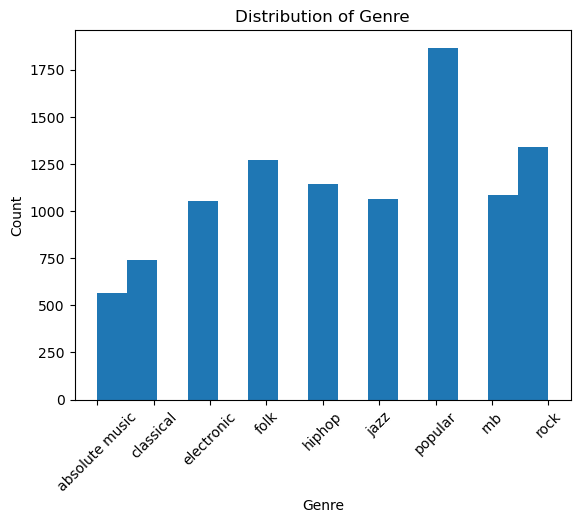

In [34]:
# Distribution of Genre
plt.figure() 
plt.hist(spotify.genre, bins=15)
plt.title("Distribution of Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The genres look fairy distributed. Classical music and absolute music have the least amount of songs. Popular music has the most amount of songs. The others have around the same number of songs. 

**Do these need to be at the same levels in order to have enough for the model to work with? Should we eliminate the genres with smaller amounts of songs?**

In [35]:
spotify.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'song_name', 'artist', 'genre'],
      dtype='object')

In [36]:
len(spotify.columns)

22

Let's look at the distribution of all the numeric columns: 

In [ ]:
numeric_cols = 